<a href="https://colab.research.google.com/github/anoki05/Heart-Disease-Visualizaton/blob/main/DVprojectWinter2022_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('dataset.csv')
print('Data read successfully')
data.head()  #This function returns the first n rows for the object based on position


Saving dataset.csv to dataset (5).csv
Data read successfully


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.sample(10)
#data.head()  #This function returns the first n rows for the object based on position

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
105,72.0,1,328,0,30,1,621000.0,1.70,138,0,1,88,1
122,60.0,0,96,1,38,0,228000.0,0.75,140,0,0,95,0
69,65.0,0,113,1,25,0,497000.0,1.83,135,1,0,67,1
183,75.0,0,99,0,38,1,224000.0,2.50,134,1,0,162,1
181,59.0,1,176,1,25,0,221000.0,1.00,136,1,1,150,1
115,58.0,1,400,0,40,0,164000.0,1.00,139,0,0,91,0
5,90.0,1,47,0,40,1,204000.0,2.10,132,1,1,8,1
279,55.0,0,84,1,38,0,451000.0,1.30,136,0,0,246,0
67,72.0,1,110,0,25,0,274000.0,1.00,140,1,1,65,1
134,81.0,0,4540,0,35,0,231000.0,1.18,137,1,1,107,0


In [ ]:
#checking missing data 

data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
data.info()  
#info method prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#Let us see the description of the data in the DataFrame 
data.describe()
#The describe() method computes and displays summary statistics for a Python dataframe

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
#Before we start the visualization let us see the pairwise correlation of all columns in the dataframe
data.corr()   #corr() is used to find the this

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


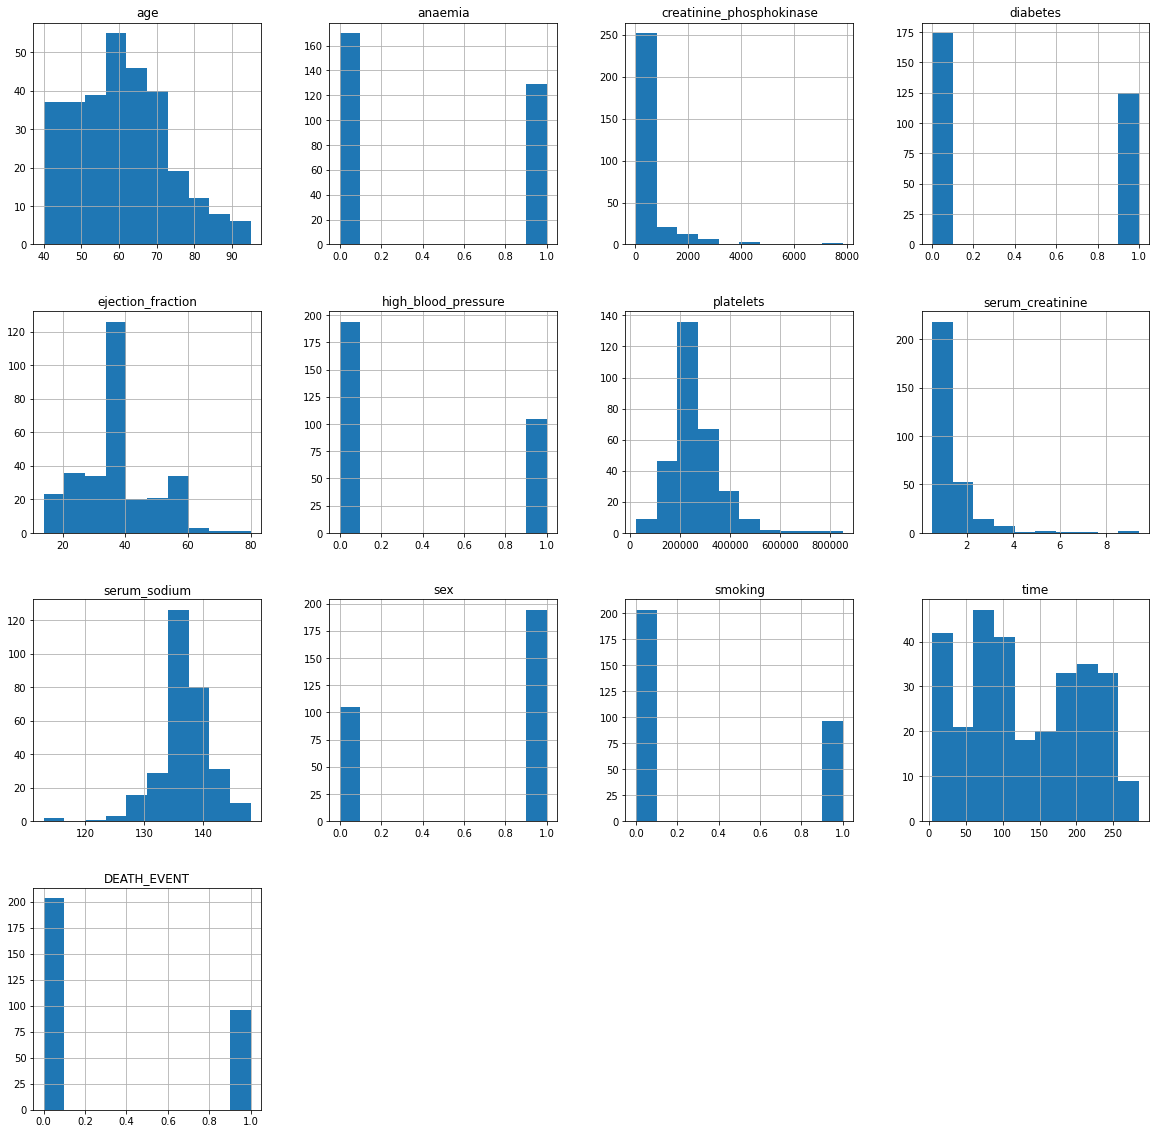

In [ ]:
import matplotlib.pyplot as plt
data.hist(figsize = (20,20))

plt.show()

Observation:
1. A histogram is the most commonly used graph to show frequency distributions. A
frequency distribution shows how often each different value in a set of data occurs.
2. The above plot is the general frequency distribution of each data in the dataset .Here
we can see that 60 has high frequency distribution
3. The height of the histogram reveals where the data is concentrated, the taller the
histogram the more the concentration.


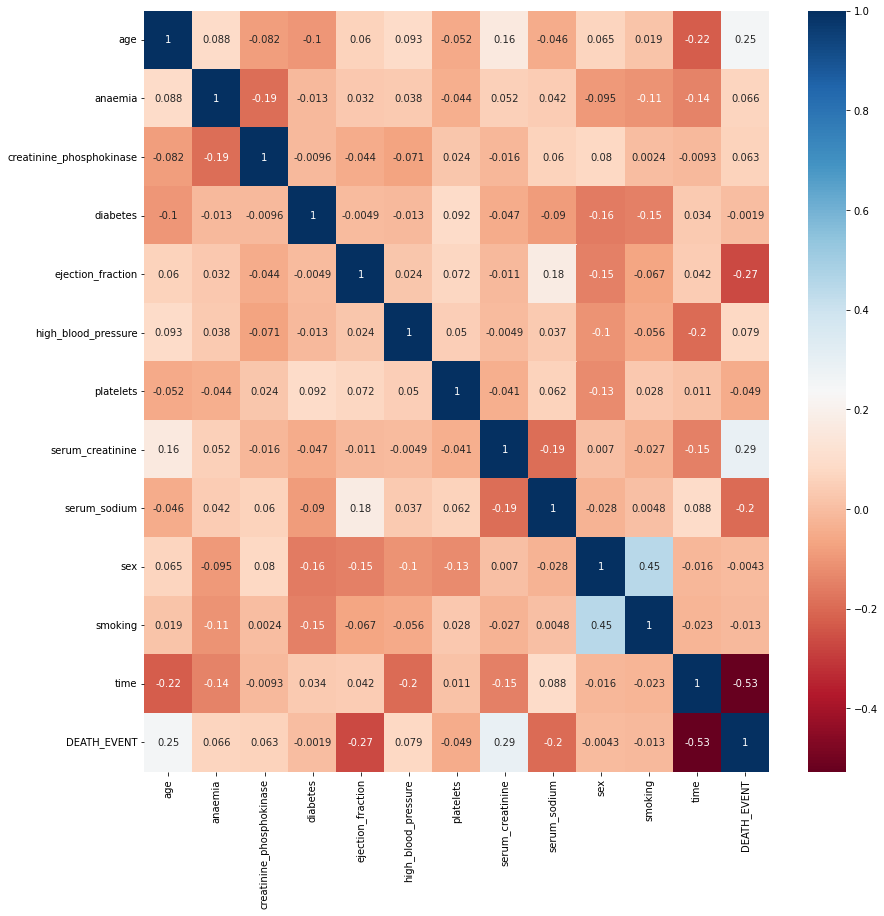

In [ ]:
#heatmap for understanding the correlation between features 
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(),cmap='RdBu', annot=True)
plt.show()
#['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu','RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])

Observation:


1. This heatmap shows the correlation between features .The correlation between
the same feature is 1
2.  The intensity of the colour represents how well two variables are related to each
other.
We can see the following correlations from the above figure
3. A slightly positive correlation occurs between smoking and sex
4.  Strong negative correlation between time and death event
5. Slightly negative correlation occurs between age and time , ejection fraction
and death event ,time and high blood pressure ,serum sodium and death event


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


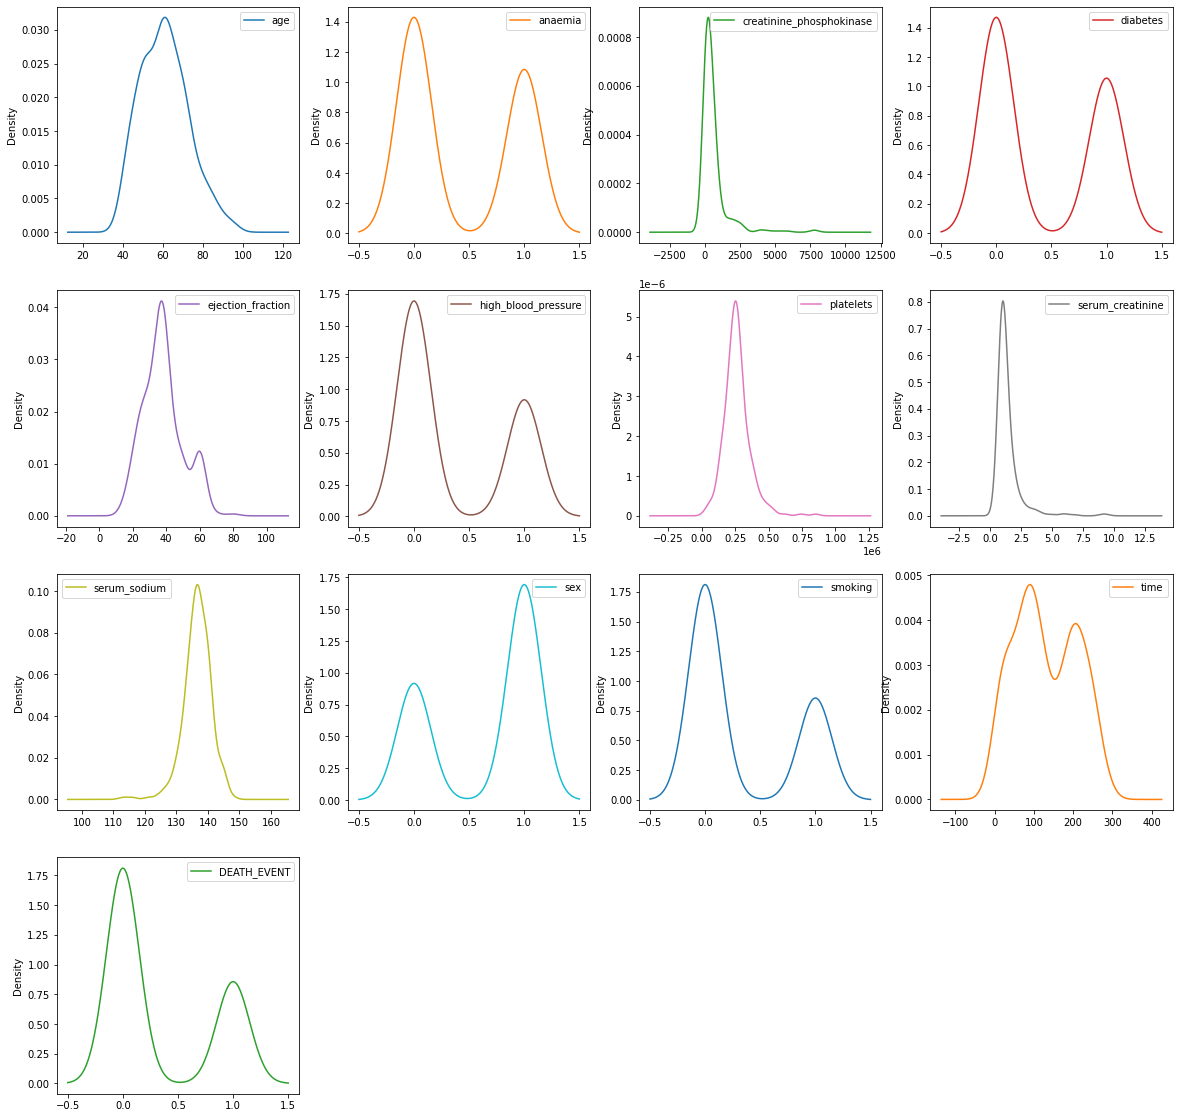

In [ ]:
#to check the distribution of the dataset we will plot the density chart for each of its feature.

fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
data.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()


Density plot is used to show the distribution variable. Here, we can find the
distribution of each attribute of the dataset. The peak value in the interval of the
Observation:

1.  Density plot shows the average value of that attribute.For example, the peak value for density plot for age attribute is around 60
which indicates that the maximum number of people’s age in the dataset is
around 60.
2.  Density plot for anaemia indicates that people either have anaemia or they
don’t have it . The plot has peak value at interval point 0 and 1 .
❖ 0- Don’t have anaemia;
❖ 1- Have anaemia
Number of people who don’t have anaemia is more than people with
anaemia
3.  Similarly, for the death rate we can see the curve at 0 has a higher peak
than curve at 1 which indicates that the number of surviving patient records
is more than the number of died patient records.
❖0- not died
❖1- died
4.  Number of male patients recorded is more than the number of female
patients recorded because peak value is more for male patients




/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


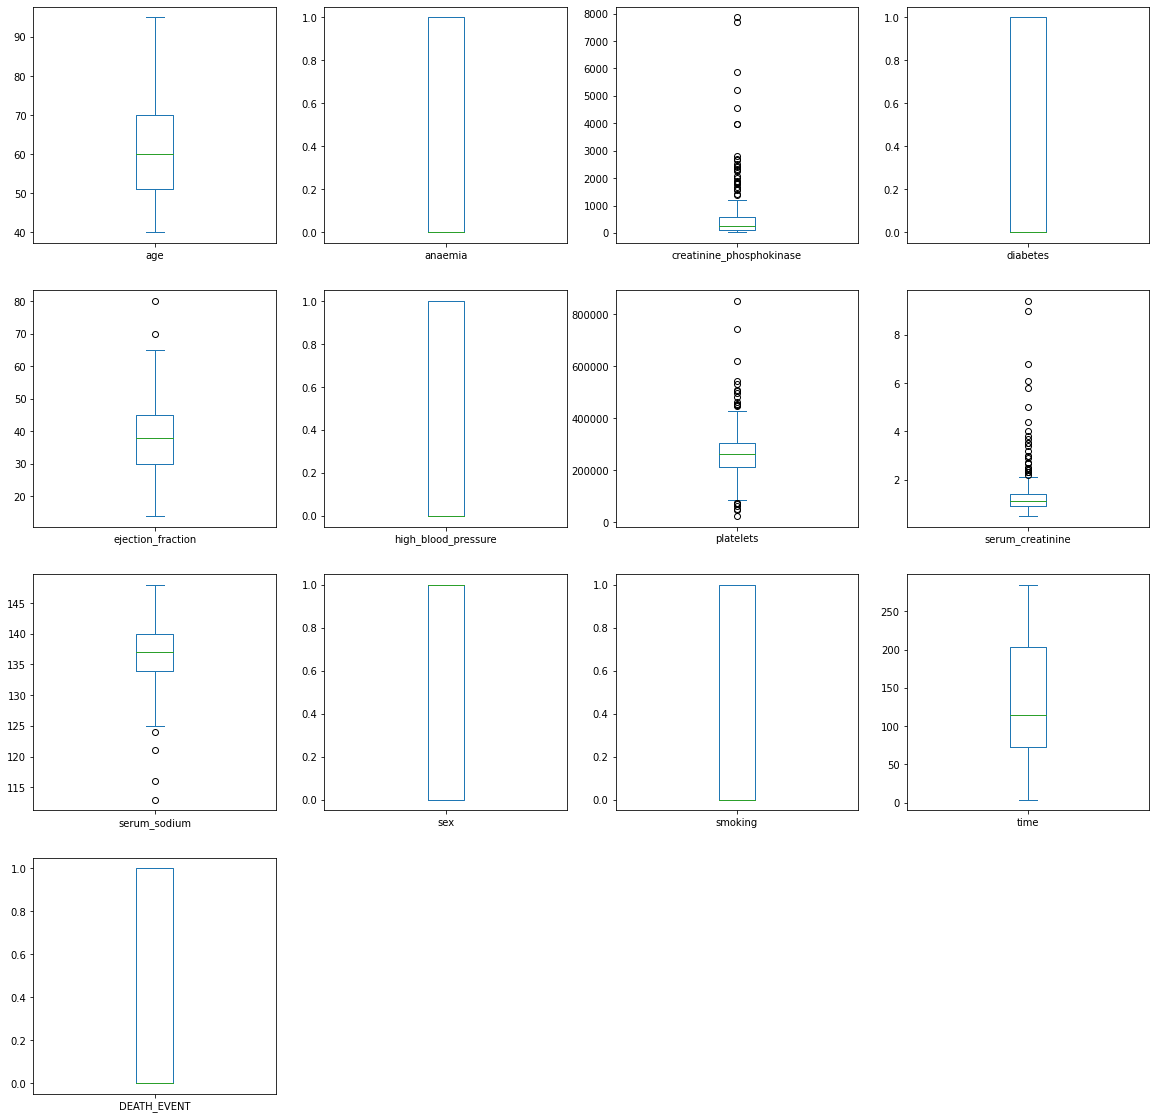

In [ ]:
#For checking the outliers in the dataset we will plot the box plot of each feature.
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

Observation:
 

1.  For example, from the box plot for age, we can find out that maximum age isnear 90(exactly 95) and minimum age is 40. Here,we can find no
outliers(meaning no values lie out of the range).
2.   But the boxplot for creatine phosphokinase has outliers indicating that few data point values are either very high or very less than the average range of values
3. Maximum value of creatinine phosphokinase is between 7000 to 8000 and
minimum is 0.
4. Boxplot for anaemia has no quartile division because the value is either 0 or 1.
❖ 0- Don’t have anaemia
❖ 1- Have anaemia
So,the maximum value is 1 and minimum value is 0.
5. Note,boxplot for attributes with categorical values will not display the quartile
division values, only the maximum and minimum values can be inferred from
such plots.)
6. Attributes with categorical data values are anaemia,diabetes,high blood
pressure,sex,smoking,death event. Box plots for these attributes only show
maximum and minimum value.
❖ 1- maximum value indicating presen(in case of sex 1 indicates male)
❖ 0- minimum value indicating absence(in case of sex 0 indicates female)


In [ ]:
fig = px.pie(data, names='DEATH_EVENT', title='Distribution of Death Events in Patients',width=600, height=400)
fig.show()

Observation:
1. This pie chart givesd us the percentage of death due to heart failure. 
2. Here 1 denotes that the death_event has occured due to heart failure the 0 represents the later. 
3. Thus from the pie chart we are able to understand that 32.1% of death is due to Heart failure.

Percentage of Super Senior people lose their life : 72.22222222222221
Percentage of Senior age group people lose their life : 32.773109243697476
Percentage of Adults people lose their life : 28.387096774193548


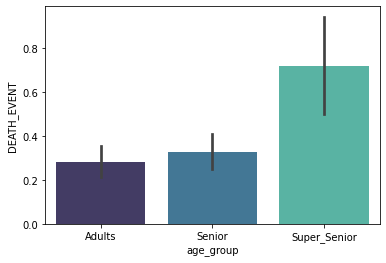

In [ ]:
#For age feature let us see the death event (due to heart failure)
bins = [40, 60, 80, np.nan]
labels = ['Adults', 'Senior', 'Super_Senior']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

print('Percentage of Super Senior people lose their life :', data['DEATH_EVENT'][data['age_group']=='Super_Senior'].value_counts(normalize=True)[1]*100)
print('Percentage of Senior age group people lose their life :', data['DEATH_EVENT'][data['age_group']=='Senior'].value_counts(normalize=True)[1]*100)
print('Percentage of Adults people lose their life :', data['DEATH_EVENT'][data['age_group']=='Adults'].value_counts(normalize=True)[1]*100)

sns.barplot(x='age_group', y='DEATH_EVENT', data=data, palette="mako")
plt.show()

Observation:
1. Super senior citizens, i.e, the residents who have aged 80 or more, are
mostly prone to experience a sudden cardiac death in cases of heart failure.
2. A precision of around 72.22222222222221% of super senior citizens die a
cardiac death.
3. About 82% of people who die of cardiac failures are 65 or older.

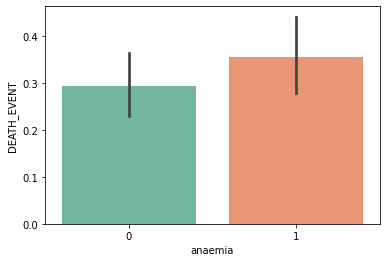

Percentage of people who have anamia and lose their life : 35.65891472868217
Percentage of people who do not have anamia and lose their life : 29.411764705882355


In [ ]:
#For anaemia
print('Percentage of people who have anamia and lose their life :', data['DEATH_EVENT'][data['anaemia']==1].value_counts(normalize=True)[1]*100)
print('Percentage of people who do not have anamia and lose their life :', data['DEATH_EVENT'][data['anaemia']==0].value_counts(normalize=True)[1]*100)
sns.barplot(x='anaemia', y='DEATH_EVENT', data=data, palette="Set2")
plt.show()
#1-have anaemia
#0-do not have anaemia


Observation:
1. We have plotted the death_event aganist anaemia
2. 0- represents that people don't have anaemia while 1- represent that people have anaemia.
3. From the plot we are able to understand that 35.6% people who have anaemia died due to heart failure.

Percentage of people who have normal creatinine and lost their life : 24.675324675324674
Percentage of people who have abnormal creatinine and lost their life : 34.68468468468468


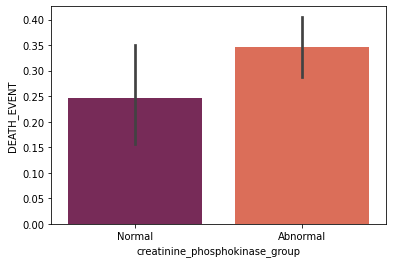

In [ ]:
bins = [10, 120, np.nan]
labels = ['Normal','Abnormal']
data['creatinine_phosphokinase_group'] = pd.cut(data['creatinine_phosphokinase'], bins=bins, labels=labels)
print('Percentage of people who have normal creatinine and lost their life :', data['DEATH_EVENT'][data['creatinine_phosphokinase_group']=='Normal'].value_counts(normalize=True)[1]*100)
print('Percentage of people who have abnormal creatinine and lost their life :', data['DEATH_EVENT'][data['creatinine_phosphokinase_group']=='Abnormal'].value_counts(normalize=True)[1]*100)
sns.barplot(x='creatinine_phosphokinase_group', y='DEATH_EVENT', data=data, palette="rocket")
plt.show()

Observation:
1. The above plot gives us a visualization on how death_events occur based on the level of creatinine.
2.  Death rate is found to be relatively higher when the CPK(creatine phosphokinase) rate is abnormal.
3. The normal range of CPK for a male is 39-308 Units/Litre.
4. The normal range of CPK for a female is 26-192 Units/Litre.


Percentage of people who have anamia and lose their life : 26.82926829268293
Percentage of people who do not have anamia and lose their life : 20.51282051282051


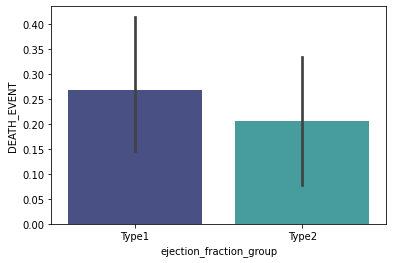

In [ ]:
a=data[data.ejection_fraction>40]
b=data[data.ejection_fraction<40]
bins=[40,50,np.nan]
labels=['Type1','Type2']
data['ejection_fraction_group']=pd.cut(data['ejection_fraction'],bins=bins,labels=labels)
print('Percentage of people who have anamia and lose their life :', data['DEATH_EVENT'][data['ejection_fraction_group']=='Type1'].value_counts(normalize=True)[1]*100)
print('Percentage of people who do not have anamia and lose their life :', data['DEATH_EVENT'][data['ejection_fraction_group']=='Type2'].value_counts(normalize=True)[1]*100)

sns.barplot(x='ejection_fraction_group',y='DEATH_EVENT',data=data, palette="mako")
plt.show()

The term "ejection fraction" refers to the percentage of blood that's pumped out
of a filled ventricle with each heartbeat. The ejection fraction is usually measured
only in the left ventricle.
**Observation:**
1. Positive death events due to type 1 are relatively greater.
2. Normal ejection fraction range is 52-72% for men.
3. Normal ejection fraction range is 54-74% for women.
4. An ejection fraction of 40 or lesser might be evidence for heart failure


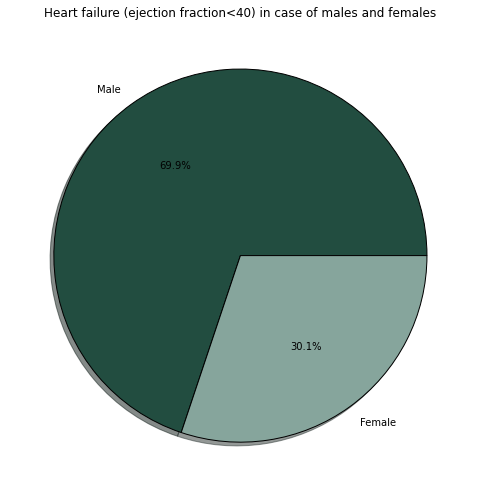

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
dataframe=pd.DataFrame(data,columns=['ejection_fraction','DEATH_EVENT','sex'])
type1=dataframe.loc[(dataframe['ejection_fraction']<40) & (dataframe['sex']==1) & (dataframe['DEATH_EVENT']==1)]
type2=dataframe.loc[(dataframe['ejection_fraction']<40) & (dataframe['sex']==0) & (dataframe['DEATH_EVENT']==1)]
label = ['Male','Female']
data = [len(type1),len(type2)]
fig = plt.figure(figsize =(10, 7))
colors=['#224D40','#86A59C']
plt.pie(data, labels = label,colors=colors,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Heart failure (ejection fraction<40) in case of males and females")
plt.tight_layout()
plt.show()

The above pie chart is plotted to observe the chances of heart failure based
on gender.
1. As we observe from the pie chart, 68.8% of total deaths were observed in
the smoking population of the dataset, whereas for the non-smoking
population it is 31.2%.
2. Research says cigarettes can permanently damage the heart and blood
vessels which lead to cardiovascular diseases.
3. Also, according to the American Heart Association, cardiovascular disease
accounts for about 800,000 U.S. deaths every year, making it the leading
cause of all deaths in the United States. Of those, nearly 20 percent are due
to cigarette smoking.
4. Thus, our observations for the given dataset hold true as per the research.


Percentage of people who have diabetes and lose their life : 32.0
Percentage of people who do not have diabetes and lose their life : 32.18390804597701


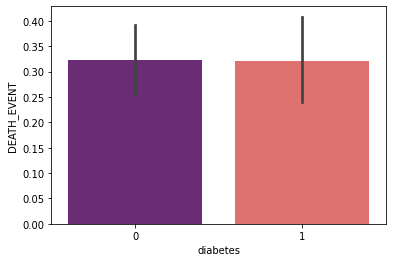

In [ ]:
#For diabetes 
sns.barplot(x='diabetes', y='DEATH_EVENT', data=data, palette="magma")
print('Percentage of people who have diabetes and lose their life :', data['DEATH_EVENT'][data['diabetes']==1].value_counts(normalize=True)[1]*100)
print('Percentage of people who do not have diabetes and lose their life :', data['DEATH_EVENT'][data['diabetes']==0].value_counts(normalize=True)[1]*100)
#For anaemia

plt.show()

Observation:

1. In the plot, 0- The person mentioned is not a diabetic. 1- The person mentioned is a diabetic.
2. The death rate remains neutral irrespective of a person’s diabetic status.
3. Number one cause of death for people with diabetes is due to Cardiovascular Diseases

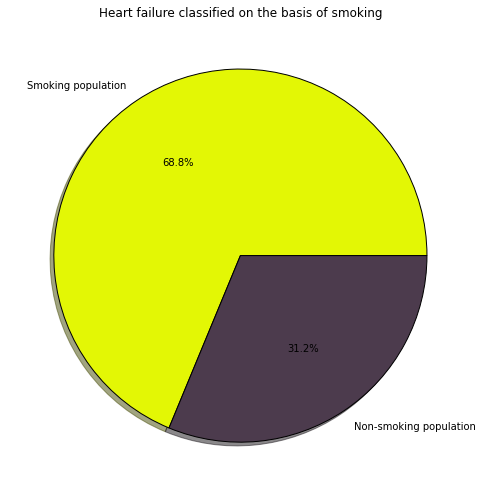

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
dataframe=pd.DataFrame(data,columns=['smoking','DEATH_EVENT','sex'])
type1=dataframe.loc[(dataframe['smoking']==1) & (dataframe['DEATH_EVENT']==1)]
type2=dataframe.loc[(dataframe['smoking']==0) & (dataframe['DEATH_EVENT']==1)]
label = ['Smoking population','Non-smoking population']
data = [len(type2),len(type1)]
fig = plt.figure(figsize =(10, 7))
colors=['#e3f705','#4C3B4D']
plt.pie(data, labels = label,colors=colors,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title('Heart failure classified on the basis of smoking')
plt.tight_layout()
plt.show()

Observation:
1. As we observe from the pie chart, 68.8% of total deaths were observed in
the smoking population of the dataset, whereas for the non-smoking
population it is 31.2%.
2. Research says cigarettes can permanently damage the heart and blood
vessels which lead to cardiovascular diseases.
3. Also, according to the American Heart Association, cardiovascular disease
accounts for about 800,000 U.S. deaths every year, making it the leading
cause of all deaths in the United States. Of those, nearly 20 percent are due
to cigarette smoking.
4. Thus, our observations for the given dataset hold true as per the research

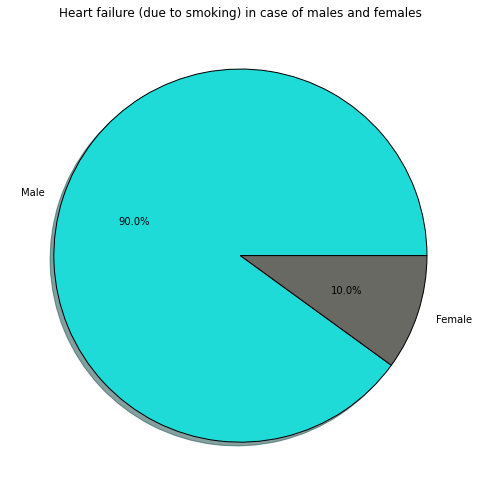

In [ ]:
#smoking male vs female
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
dataframe=pd.DataFrame(data,columns=['smoking','DEATH_EVENT','sex'])
type1=dataframe.loc[(dataframe['smoking']==1) & (dataframe['sex']==1) & (dataframe['DEATH_EVENT']==1)]
type2=dataframe.loc[(dataframe['smoking']==1) & (dataframe['sex']==0) & (dataframe['DEATH_EVENT']==1)]
label = ['Male','Female']
data = [len(type1),len(type2)]
fig = plt.figure(figsize =(10, 7))
colors=['#1fdbd8','#686963']
plt.pie(data, labels = label,colors=colors,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Heart failure (due to smoking) in case of males and females")
plt.tight_layout()
plt.show()
# review-2


Observation:
1.  One out of every 5 smoking-related deaths is caused by heart disease.
2.  Women older than 35 who smoke and take birth control pills are at much greater risk
for heart disease or stroke.
3.  Cigarette smokers are 2 to 4 times more likely to get heart disease than non smokers.
4.  Cigarette smoking doubles a person's risk for stroke.


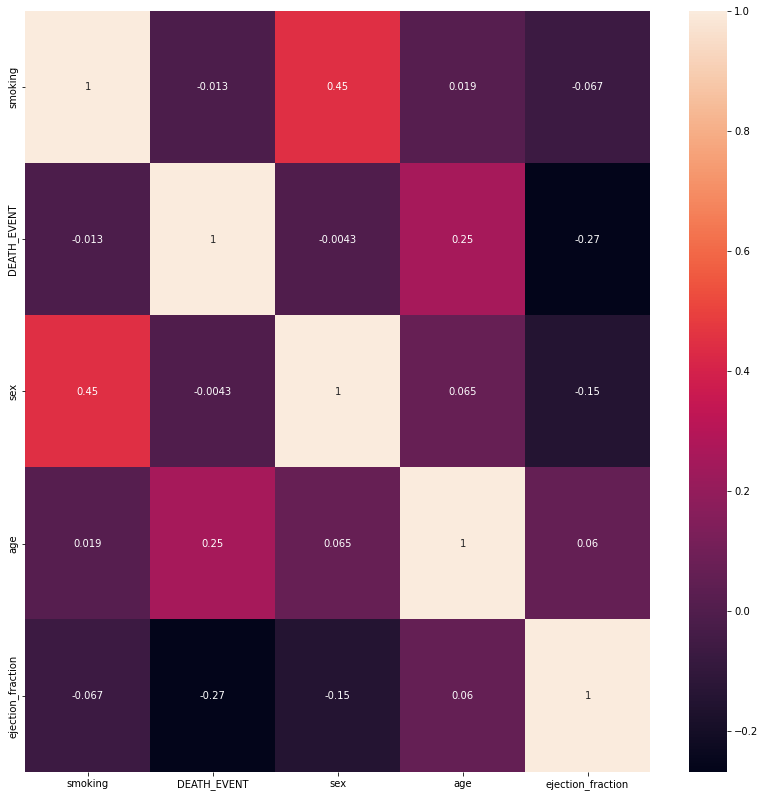

In [ ]:
import pandas as pd
df=pd.DataFrame(data,columns=['smoking','DEATH_EVENT','sex','age','ejection_fraction'])
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True)
plt.show()

Observation:
1. Here we can observe that slightly positive correlation exists between smoking
and sex , death event and age
2. Slightly negative correlation for sex and death event , ejection fraction and
smoking ,
Death event and smoking
3. Strongly negative correlation occurs between death events and ejection fraction .


In [ ]:
import plotly.express as px
fig = px.histogram(data, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=data.columns,
                   title ="Distribution of PLATELETS Vs DEATH_EVENT", 
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

Observation:
1. Distribution of Platelets vs Death event 
2. Patients with acute decompensated heart failure had similar prevalence of
thrombocytopenia as those with stable heart failure (12.3% vs 9.5%, p=0.22). Patients with thrombocytopenia had a higher risk ratio for all-cause mortality compared to patients with normal platelet counts (RR 1.35, 95% CI 1.14–1.60, p=0.002)
3. We can infer from the plot that people with thrombocytopenia(less platelet count) have a risk of heart failure


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



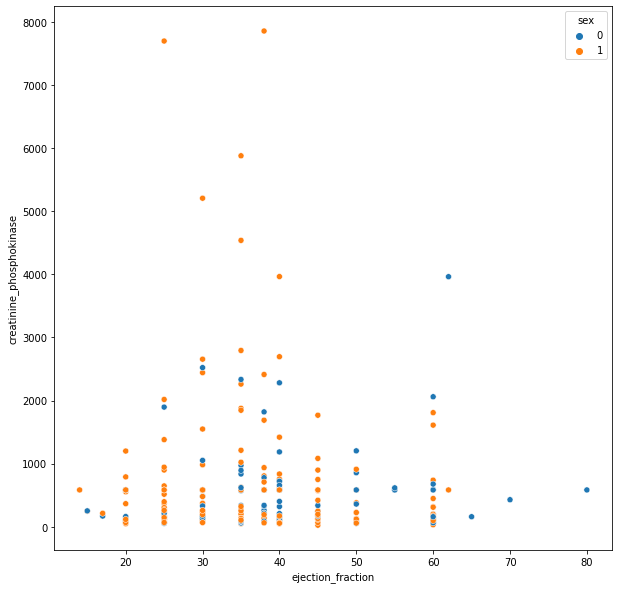

In [ ]:
import numpy
import matplotlib.pyplot as plt
x = data['ejection_fraction']
y = data['creatinine_phosphokinase']
plt.figure(figsize=(10,10))
sns.scatterplot(x,y,hue='sex',data=data)
plt.show()

Observation:
1. A low ejection fraction is often a sign of an underlying heart disease. Many
different heart and vascular conditions can lead to low ejection fraction.
2. There are high chances of heart failure when ejection fraction falls below 40
3. In hospitals, creatinine phosphokinase test is done when there are signs of a
heart failure.Extremely high values of creatinine phosphokinase indicate heart
failure.
4. From the graph, we can clearly observe that the value of creatinine
phosphokinase is high when the ejection fraction falls below 40 and if gender is
considered, the trend is observed in males prominently.
5. When the total CPK level is very high, it most often means there has been
injury or stress to muscle tissue, the heart, or the brain.

In [ ]:
import plotly.express as px
fig=px.scatter(data,x='age',y='ejection_fraction',color='serum_sodium',size='sex',hover_data=['DEATH_EVENT'])
fig.show()

Hyponatremia or low serum sodium level is typically defined as a serum sodium
concentration of <135 mEq/L and is one of the most common biochemical disorders
featured in heart failure patients.
**Observation:**
1. Ejection fraction decreases with age in most cases.
2. Serum sodium decreases with age in most cases.
3. Positive death events are observed after the age of 70


In [ ]:
fig=px.box(data,x='DEATH_EVENT',y='creatinine_phosphokinase',color='sex')
fig

Observation:
1. Box plot between creatinine phosphokinase and death event categorised by
gender.
This, plot shows that male population have slightly higher level of creatine
phosphokinase than female population
2. This difference in significant at the time of death where male have significantly
higher creatine phosphokinase than female
3.  Also, we notice that the creatine phosphokinase enzyme is low during death
when compared to the normal range when alive. This signifies that lower
creatine phosphokinase can pose high risk to heart failure.

Text(0, 0.5, 'death')

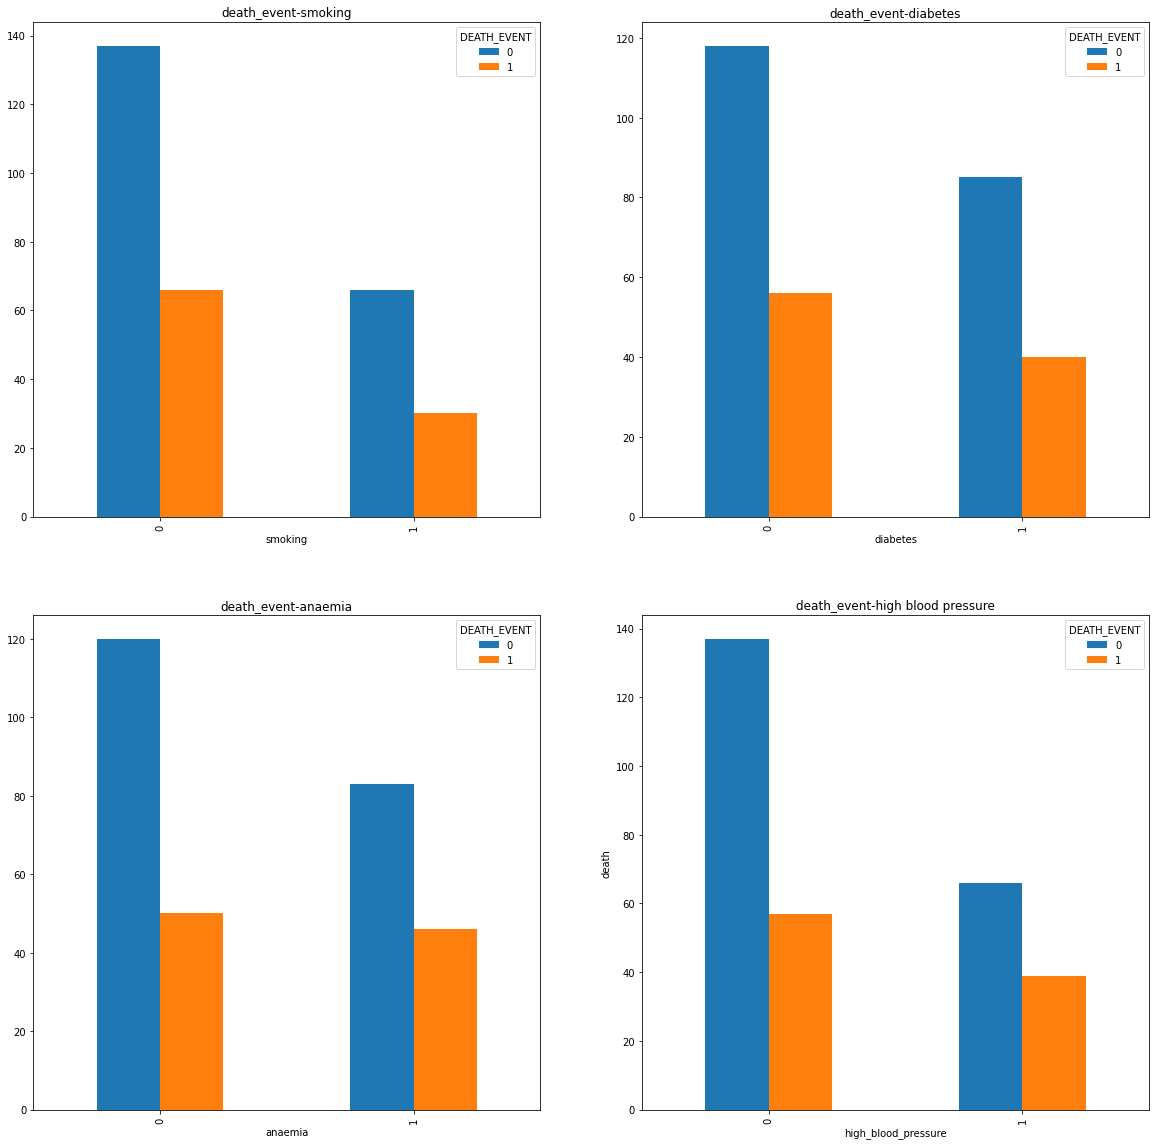

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(20,20))
pd.crosstab(data['smoking'],data['DEATH_EVENT']).plot(kind='bar',ax=axes[0,0],title='death_event-smoking')
plt.ylabel('death')

pd.crosstab(data['diabetes'],data['DEATH_EVENT']).plot(kind='bar',ax=axes[0,1],title='death_event-diabetes')
plt.ylabel('death')


pd.crosstab(data['anaemia'],data['DEATH_EVENT']).plot(kind='bar',ax=axes[1,0],title='death_event-anaemia')
plt.ylabel('death')

pd.crosstab(data['high_blood_pressure'],data['DEATH_EVENT']).plot(kind='bar',ax=axes[1,1],title='death_event-high blood pressure')
plt.ylabel('death')

Observation:
**Effect of smoking on death event**
1. In the plot,
Blue bar- Negative death event, Yellow bar- Positive death event.
2. In the X axis,0- Male, 1- Female.
3. Death rates in males are greater than that of females. This is because the
count of male smokers is greater than female smokers.
4. Cigarette smoking causes more than 480,000 deaths each year in the
United States. This is nearly one in five deaths.
5. Smoking causes about 90% of all lung cancer deaths.
6. Smoking causes about 80% of all deaths from chronic obstructive pulmonary disease
(COPD).





Observation: **Effect of diabetes on death event**
1. In the plot, lue bar- Negative death event, Yellow bar- Positive death event.
2. In the X axis,0- Non diabetic person, 1- Diabetic person.
3. Mortality rate due to diabetes is normal.
4. The risk of death due to diabetes for a 20 year old is 0.0005%
5. The risk of death due to diabetes in a 60 year old is about 1 in 10,000.
6. In an 80 year old it is 1 in 1000
7. We can conclude that in diabetes, risk of death increases with age1.

Observation: **Effect of anaemia on death event**
1. In the plot,Blue bar- Negative death event, Yellow bar- Positive death event.
2. In the X axis,0- Not anemic, 1- Anemic.
3. Death due to anemia is relatively less.
4. Case fatality rates, mainly for hospital studies, varied from 1% to 50%.
5. The relative risk of mortality associated with moderate anemia (hemoglobin 40 – 80
g/L) was 1.35.
6. The relative risk of mortality associated with severe anemia (47 g/L) was 3.51.


Observation: **Effect of high blood pressure on death event**
1. Raised blood pressure is responsible for around 13.5% of death in the total
population.
2. 47% of adults in the US have hypertension/ high BP.
3. Between 30 and 50 percent of persons over the age of 50 may have chronic
hypertension
4. The threat of death due to hypertension increases with age.


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = data[(data["DEATH_EVENT"]==0) & (data["high_blood_pressure"]==0)]
d2 = data[(data["DEATH_EVENT"]==1) & (data["high_blood_pressure"]==0)]
d3 = data[(data["DEATH_EVENT"]==0) & (data["high_blood_pressure"]==1)]
d4 = data[(data["DEATH_EVENT"]==1) & (data["high_blood_pressure"]==1)]

label1 = ["No High BP","High BP"]
label2 = ['No High BP - Survived','No High BP - Died', "High BP -  Survived", "High BP  - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="HIGH BP"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="HIGH BP VS DEATH_EVENT"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="HIGH BP DISTRIBUTION IN THE DATASET \
                  HIGH BP VS DEATH_EVENT",
    annotations=[dict(text='HIGH BP', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='HIGH BP VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

Observation:
1. 64.9% of the people report normal blood pressure in contrast to the 35.1%
which reported high blood pressure.
2. A significant number of people i.e 13% who reported high blood pressure
succumbed to heart failure.
3. Also, 22.1 % of the observations with high blood pressure showed a negative
death event.
4.Moreover, 19.1 % of the observations who reported a normal blood pressure
also showed a positive death event.





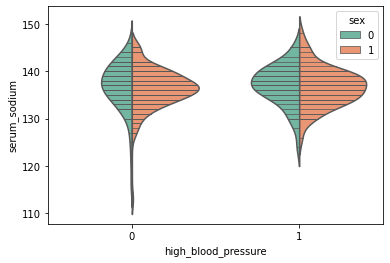

In [ ]:
import seaborn as sns
plot=sns.violinplot(x=data['high_blood_pressure'],y=data['serum_sodium'],hue='sex',data=data,palette='Set2',split=True,scale='count',inner='stick')
plot


Observation:
1. A normal blood sodium level is between 135 and 145 milliequivalents per litre
(mEq/L).
2. Sodium levels greater than that indicate chances of high blood pressure.
3. From the violin plot, we can make out that, when a patient doesn’t suffer from high blood pressure, the density is more for the normal sodium level i.e 135 to 145.
4. In contrast when the patient is having high blood pressure, the density is more when values rise above 145.
5. From the plot, it can also be observed that men are more likely to have higher
bp levels.


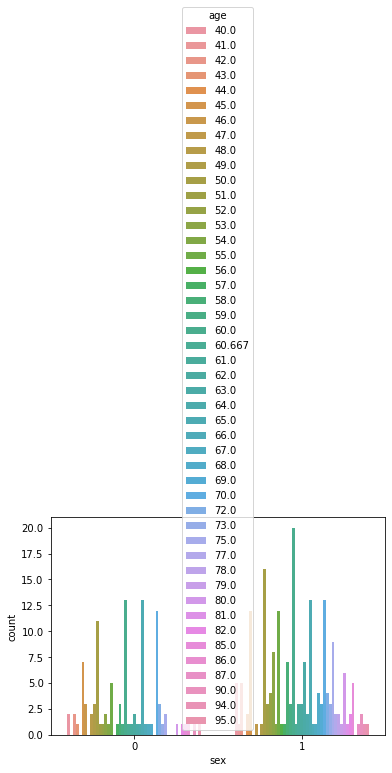

In [ ]:
sns.countplot(x ='sex',hue="age", data = data)

plt.show()

Observation:
1. Here the count plot is drawn for sex with hue as age
2. We can clearly infer the sex of the person by using the age color and the count for the same is being mentioned in y-axis .


In [ ]:
import seaborn as sns
import plotly.express as px
fig = px.violin(data,x='high_blood_pressure',y='age',color="DEATH_EVENT", box=True, points="all",hover_data=data.columns)
fig.show()

Observation: **Effect of high blood pressure and age on death event**
1. The above violin plot is used to understand the effect of high blood pressure
and age on heart failure.
2. From the graph, we can see that many patients suffering from Hypertension
suffered a heart attack between the ages 50-75.